In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
!pip install opendatasets
import opendatasets as od

In [4]:
#username connorpatrickoneill
#password d6b48b2dc86dfc69fd9c7515ca7834a3
od.download("https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: connorpatrickoneill
Your Kaggle Key: ··········


100%|██████████| 754M/754M [00:22<00:00, 34.9MB/s]


In [5]:
file = './2019-airline-delays-and-cancellations/full_data_flightdelay.csv'
df=pd.read_csv(file)

In [6]:
print(df.describe())

              MONTH   DAY_OF_WEEK     DEP_DEL15  DISTANCE_GROUP  \
count  6.489062e+06  6.489062e+06  6.489062e+06    6.489062e+06   
mean   6.607062e+00  3.935598e+00  1.891441e-01    3.821102e+00   
std    3.396853e+00  1.995200e+00  3.916231e-01    2.382233e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00    1.000000e+00   
25%    4.000000e+00  2.000000e+00  0.000000e+00    2.000000e+00   
50%    7.000000e+00  4.000000e+00  0.000000e+00    3.000000e+00   
75%    1.000000e+01  6.000000e+00  0.000000e+00    5.000000e+00   
max    1.200000e+01  7.000000e+00  1.000000e+00    1.100000e+01   

       SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
count    6.489062e+06        6.489062e+06     6.489062e+06   
mean     3.046890e+00        2.783675e+01     1.337397e+02   
std      1.757864e+00        2.151060e+01     4.645213e+01   
min      1.000000e+00        1.000000e+00     4.400000e+01   
25%      2.000000e+00        1.100000e+01     9.000000e+01   
50%      3.000000e+00   

Accuracy: 0.8133680555555556
Precision: 0.7792207792207793


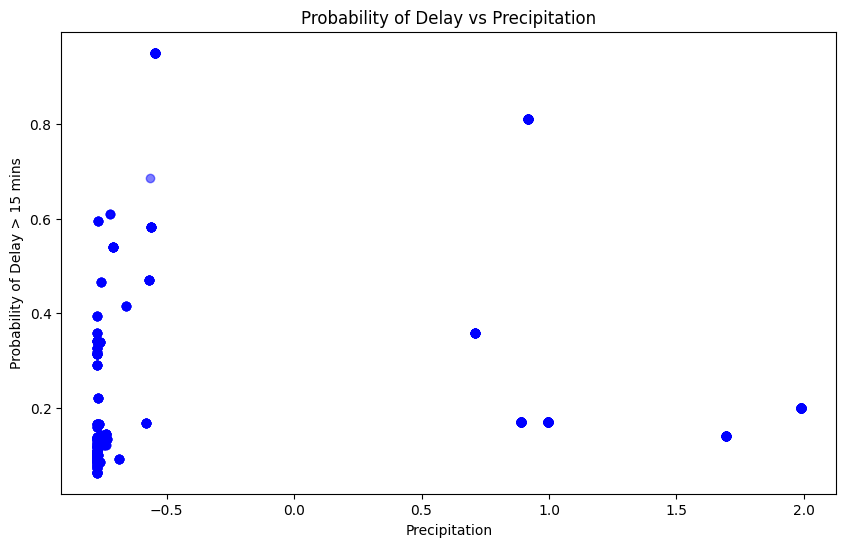

In [14]:
file = './2019-airline-delays-and-cancellations/full_data_flightdelay.csv'
df=pd.read_csv(file)
df = df[['DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']]
df = df.dropna()
df = df[(df['PRCP'] > 5.8) | (df['SNOW'] > 8.6) | (df['SNWD'] > 12.5)]
df = pd.get_dummies(df, columns=['DEPARTING_AIRPORT'], drop_first=True)
X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
probabilities = log_reg.predict_proba(X_test)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], probabilities, color='blue', alpha=0.5)  # Assuming PRCP is the first feature
plt.xlabel('Precipitation')
plt.ylabel('Probability of Delay > 15 mins')
plt.title('Probability of Delay vs Precipitation')
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/flight_data1.csv')
df = df[['DEPARTING_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND', 'DEP_DEL15']]
df = df.dropna()
df = df[(df['PRCP'] > 5.8) | (df['SNOW'] > 8.6) | (df['SNWD'] > 12.5)]
print(len(df))
df = pd.get_dummies(df, columns=['DEPARTING_AIRPORT'], drop_first=True)
X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

2113


Accuracy: 0.8486997635933806
Precision: 0.8305084745762712
Sensitivity: 0.96875
Specificity: 0.47572815533980584


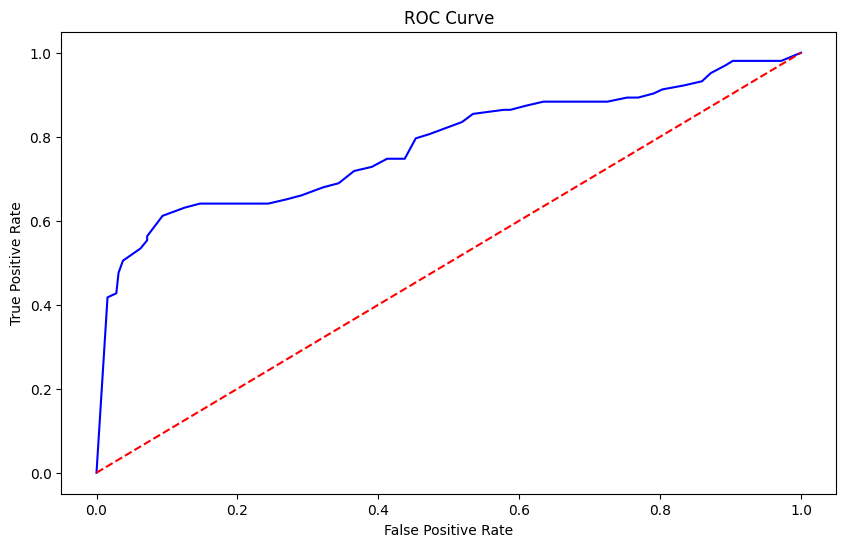

AUC: 0.7785042475728154


In [ ]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate sensitivity (recall) and specificity
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# ROC curve and AUC
probabilities = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, probabilities)
print("AUC:", auc)